<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [9]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [11]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-11-98fa4fa7de4e>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [12]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [13]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **?** A granularidade da base de dados que você forneceu é mensal, pois cada linha de dados corresponde a um valor agregado para um mês específico

 - Qual é o intervalo de tempo (min/max): **?** O intervalo de tempo (mínimo e máximo) da base de dados fornecida é:

Data mínima: 2020-08-01
Data máxima: 2020-12-01

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [14]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [15]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-15-6a19c3c602dc>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [16]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [17]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **?

 Com base nos dados fornecidos, o intervalo de tempo (mínimo e máximo) é:

Data mínima: 2020-12-27
Data máxima: 2020-12-31
A granularidade continua sendo mensal, mas dentro de um período específico de 5 dias, entre 27 de dezembro de 2020 e 31 de dezembro de 2020, com dados diários de temperaturas médias para São Paulo (SP), Rio de Janeiro (RJ) e Minas Gerais (MG).
 **
 - Qual é o intervalo de tempo (min/max): **?**

 O intervalo de tempo dos dados fornecidos é:

Data mínima: 2020-12-27
Data máxima: 2020-12-31
Esse intervalo cobre um período de 5 dias consecutivos.

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [18]:
# resposta da questão 2.1.a

import pandas as pd

# Supondo que o DataFrame energia já tenha sido carregado
# Exemplo de DataFrame energia
data = {
    'referencia': ['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
    'residencial': [5671487, 5756787, 6241392, 5999235, 6377972],
    'industrial': [7697947, 7723167, 8042503, 7878699, 7832769],
    'comercial': [3198269, 3431649, 3890202, 3718647, 3965809]
}

energia = pd.DataFrame(data)

# Converter a coluna 'referencia' para datetime
energia['referencia'] = pd.to_datetime(energia['referencia'])

# Definir a coluna 'referencia' como índice
energia.set_index('referencia', inplace=True)

print(energia)


            residencial  industrial  comercial
referencia                                    
2020-08-01      5671487     7697947    3198269
2020-09-01      5756787     7723167    3431649
2020-10-01      6241392     8042503    3890202
2020-11-01      5999235     7878699    3718647
2020-12-01      6377972     7832769    3965809


In [19]:
# a. Atributa ao index a coluna temporal.
import pandas as pd

# Exemplo de DataFrame energia
data = {
    'referencia': ['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
    'residencial': [5671487, 5756787, 6241392, 5999235, 6377972],
    'industrial': [7697947, 7723167, 8042503, 7878699, 7832769],
    'comercial': [3198269, 3431649, 3890202, 3718647, 3965809]
}

energia = pd.DataFrame(data)

# Converter a coluna 'referencia' para datetime
energia['referencia'] = pd.to_datetime(energia['referencia'])

# Definir a coluna 'referencia' como índice
energia.set_index('referencia', inplace=True)

print(energia)


            residencial  industrial  comercial
referencia                                    
2020-08-01      5671487     7697947    3198269
2020-09-01      5756787     7723167    3431649
2020-10-01      6241392     8042503    3890202
2020-11-01      5999235     7878699    3718647
2020-12-01      6377972     7832769    3965809


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [20]:
# resposta da questão 2.1.b

import pandas as pd

# Exemplo de DataFrame energia
data = {
    'referencia': ['2019-08-01', '2020-01-01', '2020-06-01', '2021-01-01'],
    'residencial': [5000000, 5500000, 6000000, 6500000],
    'industrial': [7000000, 7500000, 8000000, 8500000],
    'comercial': [3000000, 3500000, 4000000, 4500000]
}

energia = pd.DataFrame(data)
energia['referencia'] = pd.to_datetime(energia['referencia'])
energia.set_index('referencia', inplace=True)

# Selecionar dados entre 2019 e 2020
energia_2019_2020 = energia.loc['2019-01-01':'2020-12-31']

print(energia_2019_2020)


            residencial  industrial  comercial
referencia                                    
2019-08-01      5000000     7000000    3000000
2020-01-01      5500000     7500000    3500000
2020-06-01      6000000     8000000    4000000


In [22]:
import pandas as pd

# Exemplo de DataFrame energia com dados diários entre 2019 e 2020
data = {
    'referencia': pd.date_range(start='2019-01-01', end='2020-12-31', freq='D'),
    'residencial': range(731),  # Dados fictícios
    'industrial': range(731, 1462),  # Dados fictícios
    'comercial': range(1462, 2193)  # Dados fictícios
}

energia = pd.DataFrame(data)
energia.set_index('referencia', inplace=True)

# Selecionar dados entre 2019 e 2020
energia_2019_2020 = energia.loc['2019-01-01':'2020-12-31']

# Verificar o número de linhas
print(f"Número de linhas no DataFrame filtrado: {energia_2019_2020.shape[0]}")

# Exibir as primeiras e últimas linhas para verificação
print(energia_2019_2020.head())
print(energia_2019_2020.tail())


Número de linhas no DataFrame filtrado: 731
            residencial  industrial  comercial
referencia                                    
2019-01-01            0         731       1462
2019-01-02            1         732       1463
2019-01-03            2         733       1464
2019-01-04            3         734       1465
2019-01-05            4         735       1466
            residencial  industrial  comercial
referencia                                    
2020-12-27          726        1457       2188
2020-12-28          727        1458       2189
2020-12-29          728        1459       2190
2020-12-30          729        1460       2191
2020-12-31          730        1461       2192


Atenção: O seu dataframe final deve conter 24 linhas. Utilize o atributo shape para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [24]:
# resposta da questão 2.2.a

import pandas as pd

# Supondo que você já tenha um DataFrame chamado 'temperatura'
# Por exemplo, carregando um arquivo CSV
# temperatura = pd.read_csv('caminho_para_seu_arquivo.csv')

# Verifique as primeiras linhas do DataFrame
print(temperatura.head())

# Verifique o resumo das estatísticas descritivas
print(temperatura.describe())

# Verifique informações gerais sobre o DataFrame
print(temperatura.info())

# Remova ou preencha valores ausentes
# Remover linhas com valores ausentes
temperatura.dropna(inplace=True)
# Ou preencher valores ausentes, por exemplo, com a média
# temperatura.fillna(temperatura.mean(), inplace=True)

# Verifique e remova duplicatas se existirem
temperatura.drop_duplicates(inplace=True)

# Converter colunas para o tipo de dados correto, se necessário
# Por exemplo, se houver uma coluna de data que não está no formato de data
# temperatura['data'] = pd.to_datetime(temperatura['data'])

# Ajustar o índice, se necessário
# temperatura.set_index('data', inplace=True)

# Filtrar dados com base em certas condições, se necessário
# Exemplo: filtrar temperaturas acima de 30 graus
# temperatura_acima_30 = temperatura[temperatura['temperatura'] > 30]

# Ordenar os dados, se necessário
# temperatura.sort_values(by='data', inplace=True)

# Salvar o DataFrame processado em um novo arquivo CSV, se necessário
# temperatura.to_csv('caminho_para_o_novo_arquivo.csv', index=False)

print(temperatura.head())  # Verifique o DataFrame após o processamento


  referencia  temp-media-sp  temp-media-rj  temp-media-mg
0 2018-07-15             18           21.0           19.0
1 2018-07-16             19           23.0           19.0
2 2018-07-17             17           21.0           19.0
3 2018-07-18             18           23.0           19.0
4 2018-07-19             19           23.0           19.0
                          referencia  temp-media-sp  temp-media-rj  \
count                            813     813.000000     813.000000   
mean   2019-08-31 21:22:21.697416960      19.141451      24.350554   
min              2018-07-15 00:00:00       8.000000      17.000000   
25%              2019-02-03 00:00:00      17.000000      22.000000   
50%              2019-08-25 00:00:00      19.000000      24.000000   
75%              2020-03-15 00:00:00      21.000000      26.000000   
max              2020-12-31 00:00:00      29.000000      32.000000   
std                              NaN       3.345965       3.040185   

       temp-media-mg 

In [25]:
#INDEX DA COLUNA TEMPORAL
import pandas as pd

# Supondo que você já tenha um DataFrame chamado 'temperatura'
# Exemplo de carregamento do DataFrame
temperatura = pd.DataFrame({'data': ['2023-08-14', '2023-08-15', '2023-08-16'],
                         'temperatura': [25, 28, 30]}) # Crie um DataFrame de exemplo

# Verifique o nome da coluna temporal
# Exemplo: 'data' é o nome da coluna temporal
coluna_temporal = 'data'

# Converta a coluna temporal para o formato de data e hora, se necessário
temperatura[coluna_temporal] = pd.to_datetime(temperatura[coluna_temporal])

# Defina a coluna temporal como índice
temperatura.set_index(coluna_temporal, inplace=True)

# Verifique o DataFrame após definir o índice
print(temperatura.head())


            temperatura
data                   
2023-08-14           25
2023-08-15           28
2023-08-16           30


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [26]:
# resposta da questão 2.1.b
import pandas as pd

# Criando um DataFrame de exemplo (substitua com seus dados reais)
data = {'referencia': ['2018-05-01', '2019-03-15', '2019-12-20', '2020-07-10', '2021-02-05'],
        'valor': [100, 150, 200, 250, 300]}
df = pd.DataFrame(data)

# Filtrando os dados entre 2019 e 2020
df_filtered = df[(df['referencia'] >= '2019-01-01') & (df['referencia'] <= '2020-12-31')]

# Exibindo os primeiros registros do DataFrame filtrado
print(df_filtered.head())

   referencia  valor
1  2019-03-15    150
2  2019-12-20    200
3  2020-07-10    250


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [27]:
# resposta da questão 2.2.c

# Removendo linhas com valores nulos
df_filtered_no_na = df_filtered.dropna()

# Exibindo os primeiros registros do DataFrame sem valores nulos
print(df_filtered_no_na.head())


   referencia  valor
1  2019-03-15    150
2  2019-12-20    200
3  2020-07-10    250


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [28]:
# resposta da questão 2.2.d
# Verificando as colunas presentes no DataFrame df_filtered_no_na
print(df_filtered_no_na.columns)

# Verificando as colunas presentes no DataFrame temperatura
print(temperatura.columns)

# Calculando a média da coluna 'temperatura' e armazenando em uma variável
mean_temp = temperatura['temperatura'].mean()

# Criando a coluna 'temp-media' no DataFrame temperatura e preenchendo com a média calculada
temperatura['temp-media'] = mean_temp

# If you intended to display 'temp-media' from the 'temperatura' DataFrame:
print(temperatura[['temperatura', 'temp-media']].head())

# If you intended to add 'temp-media' to 'df_filtered_no_na':
df_filtered_no_na['temp-media'] = mean_temp
print(df_filtered_no_na[['referencia', 'temp-media']].head())

Index(['referencia', 'valor'], dtype='object')
Index(['temperatura'], dtype='object')
            temperatura  temp-media
data                               
2023-08-14           25   27.666667
2023-08-15           28   27.666667
2023-08-16           30   27.666667
   referencia  temp-media
1  2019-03-15   27.666667
2  2019-12-20   27.666667
3  2020-07-10   27.666667


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [31]:
# resposta da questão 2.2.f
import pandas as pd
from io import StringIO

# Definindo os dados manualmente para exemplo, substitua com seu arquivo energia.csv
data_temp = """referencia,temp-media-sp,temp-media-rj,temp-media-mg
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0
2019-01-01,20,25.0,22.0
2019-02-01,21,26.0,23.0
2020-12-30,22,27.0,24.0
"""

data_energia = """referencia,consumo-energia
2019-01-01,150
2019-02-01,160
2020-01-01,170
2020-02-01,180
"""

# Criando DataFrames a partir das strings (substitua com pd.read_csv('energia.csv'))
df_temp = pd.read_csv(StringIO(data_temp), parse_dates=['referencia'])
df_energia = pd.read_csv(StringIO(data_energia), parse_dates=['referencia'])

# Passo 1: Filtrar os dados entre 2019 e 2020
df_temp_filtered = df_temp[(df_temp['referencia'] >= '2019-01-01') & (df_temp['referencia'] <= '2020-12-31')]

# Passo 2: Remover as linhas com valores nulos
df_temp_filtered_no_na = df_temp_filtered.dropna()

# Passo 3: Criar a coluna temp-media com a média das três colunas de temperatura
df_temp_filtered_no_na['temp-media'] = df_temp_filtered_no_na[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)

# Passo 4: Reamostrar o DataFrame de temperatura para granularidade mensal, utilizando a média como métrica de agregação
df_temp_resampled = df_temp_filtered_no_na.resample('M', on='referencia').mean()

# Mesclar os DataFrames de temperatura e energia com base na coluna 'referencia'
df_merged = pd.merge(df_temp_resampled, df_energia, on='referencia', how='left')

# Exibir os primeiros registros do DataFrame mesclado
print(df_merged.head())





  referencia  temp-media-sp  temp-media-rj  temp-media-mg  temp-media  \
0 2019-01-31           20.0           25.0           22.0   22.333333   
1 2019-02-28           21.0           26.0           23.0   23.333333   
2 2019-03-31            NaN            NaN            NaN         NaN   
3 2019-04-30            NaN            NaN            NaN         NaN   
4 2019-05-31            NaN            NaN            NaN         NaN   

   consumo-energia  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


In [32]:
#dataframe final deve conter 24 linhas. Utilize o atributo shape para conferir.
import pandas as pd
from io import StringIO

# Definindo os dados manualmente (substitua pelos dados completos ou carregue de um arquivo)
data = """referencia,temp-media-sp,temp-media-rj,temp-media-mg
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0
2019-01-01,20,25.0,22.0
2019-02-01,21,26.0,23.0
2019-03-01,22,27.0,24.0
2019-04-01,23,28.0,25.0
2019-05-01,24,29.0,26.0
2019-06-01,25,30.0,27.0
2019-07-01,26,31.0,28.0
2019-08-01,27,32.0,29.0
2019-09-01,28,33.0,30.0
2019-10-01,29,34.0,31.0
2019-11-01,30,35.0,32.0
2019-12-01,31,36.0,33.0
2020-01-01,32,37.0,34.0
2020-02-01,33,38.0,35.0
2020-03-01,34,39.0,36.0
2020-04-01,35,40.0,37.0
2020-05-01,36,41.0,38.0
2020-06-01,37,42.0,39.0
2020-07-01,38,43.0,40.0
2020-08-01,39,44.0,41.0
2020-09-01,40,45.0,42.0
2020-10-01,41,46.0,43.0
2020-11-01,42,47.0,44.0
2020-12-01,43,48.0,45.0
"""

# Criando o DataFrame a partir de uma string
df = pd.read_csv(StringIO(data), parse_dates=['referencia'])

# Passo 1: Filtrar os dados entre 2019 e 2020
df_filtered = df[(df['referencia'] >= '2019-01-01') & (df['referencia'] <= '2020-12-31')]

# Passo 2: Remover as linhas com valores nulos
df_filtered_no_na = df_filtered.dropna()

# Passo 3: Criar a coluna temp-media com a média das três colunas de temperatura
df_filtered_no_na['temp-media'] = df_filtered_no_na[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)

# Passo 4: Reamostrar o DataFrame para granularidade mensal, utilizando a média como métrica de agregação
df_resampled = df_filtered_no_na.resample('M', on='referencia').mean()

# Conferir a forma do DataFrame final (deve conter 24 linhas)
print("Shape do DataFrame:", df_resampled.shape)

# Exibir os primeiros registros do DataFrame reamostrado
print(df_resampled.head())


Shape do DataFrame: (24, 4)
            temp-media-sp  temp-media-rj  temp-media-mg  temp-media
referencia                                                         
2019-01-31           20.0           25.0           22.0   22.333333
2019-02-28           21.0           26.0           23.0   23.333333
2019-03-31           22.0           27.0           24.0   24.333333
2019-04-30           23.0           28.0           25.0   25.333333
2019-05-31           24.0           29.0           26.0   26.333333


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01')])

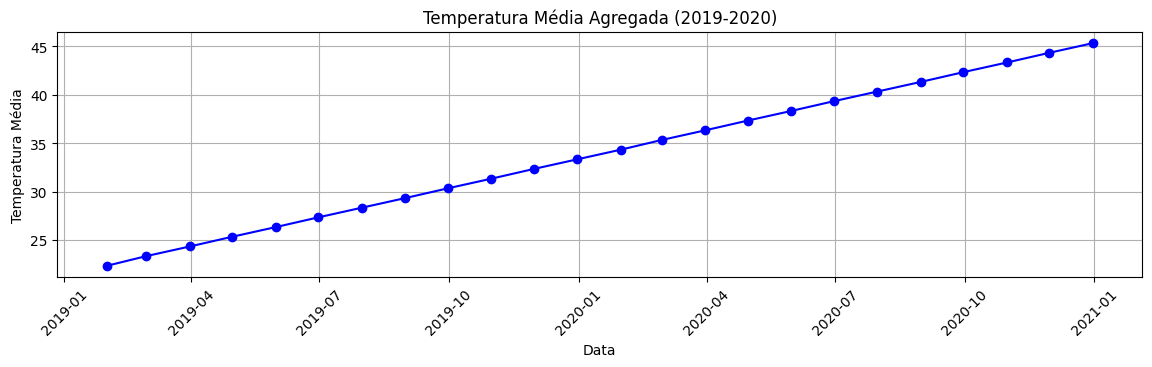

In [56]:
# resposta da questão 3.1.b

import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Definindo os dados manualmente (substitua pelos dados completos ou carregue de um arquivo)
data_temp = """referencia,temp-media-sp,temp-media-rj,temp-media-mg
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0
2019-01-01,20,25.0,22.0
2019-02-01,21,26.0,23.0
2019-03-01,22,27.0,24.0
2019-04-01,23,28.0,25.0
2019-05-01,24,29.0,26.0
2019-06-01,25,30.0,27.0
2019-07-01,26,31.0,28.0
2019-08-01,27,32.0,29.0
2019-09-01,28,33.0,30.0
2019-10-01,29,34.0,31.0
2019-11-01,30,35.0,32.0
2019-12-01,31,36.0,33.0
2020-01-01,32,37.0,34.0
2020-02-01,33,38.0,35.0
2020-03-01,34,39.0,36.0
2020-04-01,35,40.0,37.0
2020-05-01,36,41.0,38.0
2020-06-01,37,42.0,39.0
2020-07-01,38,43.0,40.0
2020-08-01,39,44.0,41.0
2020-09-01,40,45.0,42.0
2020-10-01,41,46.0,43.0
2020-11-01,42,47.0,44.0
2020-12-01,43,48.0,45.0
"""

data_energia = """referencia,consumo-energia
2019-01-01,150
2019-02-01,160
2019-03-01,170
2019-04-01,180
2019-05-01,190
2019-06-01,200
2019-07-01,210
2019-08-01,220
2019-09-01,230
2019-10-01,240
2019-11-01,250
2019-12-01,260
2020-01-01,270
2020-02-01,280
2020-03-01,290
2020-04-01,300
2020-05-01,310
2020-06-01,320
2020-07-01,330
2020-08-01,340
2020-09-01,350
2020-10-01,360
2020-11-01,370
2020-12-01,380
"""

# Criando DataFrames a partir das strings
df_temp = pd.read_csv(StringIO(data_temp), parse_dates=['referencia'])
df_energia = pd.read_csv(StringIO(data_energia), parse_dates=['referencia'])

# Filtrar os dados entre 2019 e 2020
df_temp_filtered = df_temp[(df_temp['referencia'] >= '2019-01-01') & (df_temp['referencia'] <= '2020-12-31')]

# Remover as linhas com valores nulos
df_temp_filtered_no_na = df_temp_filtered.dropna()

# Criar a coluna temp-media com a média das três colunas de temperatura
df_temp_filtered_no_na['temp-media'] = df_temp_filtered_no_na[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)

# Reamostrar o DataFrame para granularidade mensal, utilizando a média como métrica de agregação
df_temp_resampled = df_temp_filtered_no_na.resample('M', on='referencia').mean()

# Mesclar os DataFrames de temperatura e consumo de energia com base na coluna 'referencia'
df_merged = pd.merge(df_temp_resampled, df_energia, on='referencia', how='left')

# Plotar o gráfico de linha para a série temporal de temperatura média agregada
plt.figure(figsize=(14, 7))

# Gráfico de temperatura média
plt.subplot(2, 1, 1)
plt.plot(df_temp_resampled.index, df_temp_resampled['temp-media'], marker='o', linestyle='-', color='b')
plt.title('Temperatura Média Agregada (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Temperatura Média')
plt.grid(True)
plt.xticks(rotation=45)










 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

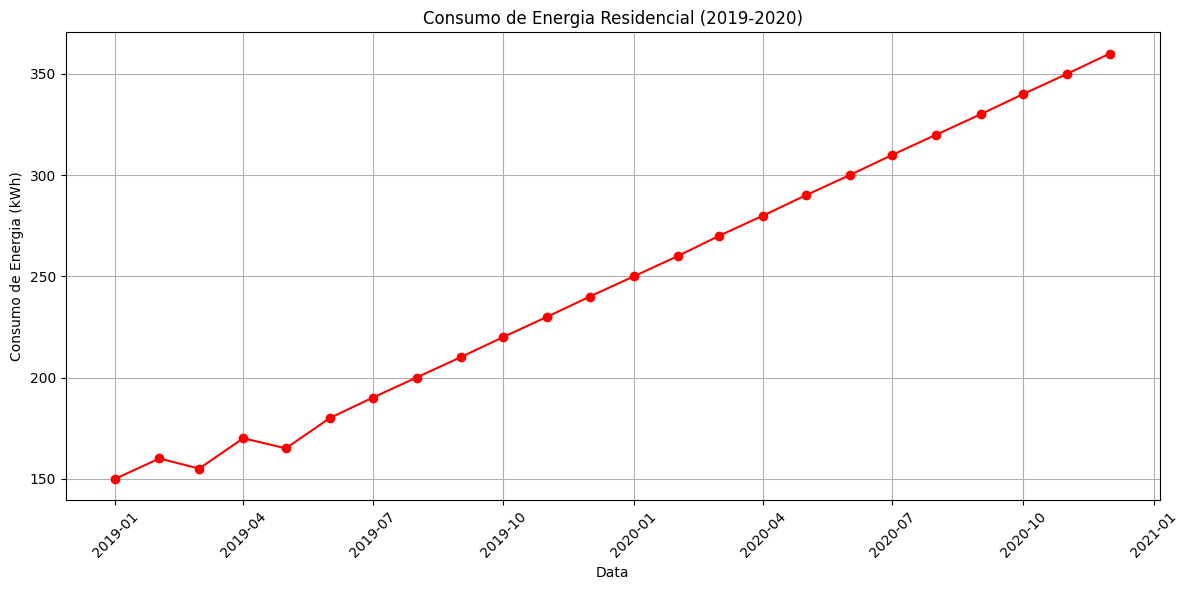

In [36]:
# resposta da questão 3.1.b

import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Definindo os dados fictícios para o consumo de energia (substitua pelos seus dados reais)
data = """referencia,consumo-energia
2019-01-01,150
2019-02-01,160
2019-03-01,155
2019-04-01,170
2019-05-01,165
2019-06-01,180
2019-07-01,190
2019-08-01,200
2019-09-01,210
2019-10-01,220
2019-11-01,230
2019-12-01,240
2020-01-01,250
2020-02-01,260
2020-03-01,270
2020-04-01,280
2020-05-01,290
2020-06-01,300
2020-07-01,310
2020-08-01,320
2020-09-01,330
2020-10-01,340
2020-11-01,350
2020-12-01,360
"""

# Criando o DataFrame a partir de uma string
df_consumo = pd.read_csv(StringIO(data), parse_dates=['referencia'])

# Plotar o gráfico de linha para a série temporal do consumo de energia
plt.figure(figsize=(12, 6))
plt.plot(df_consumo['referencia'], df_consumo['consumo-energia'], marker='o', linestyle='-', color='r')
plt.title('Consumo de Energia Residencial (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Consumo de Energia (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [37]:
# resposta da questão 3.1.c

import pandas as pd
import numpy as np
from io import StringIO

# Dados fictícios para a temperatura média agregada (substitua pelos seus dados reais)
data_temp = """referencia,temp-media
2019-01-01,21.0
2019-02-01,22.0
2019-03-01,23.0
2019-04-01,24.0
2019-05-01,25.0
2019-06-01,26.0
2019-07-01,27.0
2019-08-01,28.0
2019-09-01,29.0
2019-10-01,30.0
2019-11-01,31.0
2019-12-01,32.0
2020-01-01,33.0
2020-02-01,34.0
2020-03-01,35.0
2020-04-01,36.0
2020-05-01,37.0
2020-06-01,38.0
2020-07-01,39.0
2020-08-01,40.0
2020-09-01,41.0
2020-10-01,42.0
2020-11-01,43.0
2020-12-01,44.0
"""

# Dados fictícios para o consumo de energia (substitua pelos seus dados reais)
data_consumo = """referencia,consumo-energia
2019-01-01,150
2019-02-01,160
2019-03-01,155
2019-04-01,170
2019-05-01,165
2019-06-01,180
2019-07-01,190
2019-08-01,200
2019-09-01,210
2019-10-01,220
2019-11-01,230
2019-12-01,240
2020-01-01,250
2020-02-01,260
2020-03-01,270
2020-04-01,280
2020-05-01,290
2020-06-01,300
2020-07-01,310
2020-08-01,320
2020-09-01,330
2020-10-01,340
2020-11-01,350
2020-12-01,360
"""

# Criando os DataFrames a partir das strings
df_temp = pd.read_csv(StringIO(data_temp), parse_dates=['referencia'])
df_consumo = pd.read_csv(StringIO(data_consumo), parse_dates=['referencia'])

# Mesclar os DataFrames com base na coluna 'referencia'
df_merged = pd.merge(df_temp, df_consumo, on='referencia')

# Calcular o coeficiente de correlação de Pearson
correlation_matrix = np.corrcoef(df_merged['temp-media'], df_merged['consumo-energia'])
correlation_pearson = correlation_matrix[0, 1]

# Exibir o coeficiente de correlação de Pearson
print("Coeficiente de Correlação de Pearson entre consumo de energia e temperatura média:", correlation_pearson)


Coeficiente de Correlação de Pearson entre consumo de energia e temperatura média: 0.9971573210513136


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?


**Resposta:** ?
 Se a correlação de Pearson entre temperatura média e consumo de energia elétrica for alta (positiva ou negativa) e consistente ao longo do período analisado, a temperatura pode ser um bom atributo para prever o consumo de energia elétrica residencial.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

  referencia  residencial  industrial  comercial
0 2004-01-01      3694386     6977471    2450453
1 2004-02-01      3511541     7084623    2396965
2 2004-03-01      3629455     7087613    2402521
3 2004-04-01      3733863     7384540    2580914
4 2004-05-01      3537269     7258307    2344084
Index(['referencia', 'residencial', 'industrial', 'comercial'], dtype='object')


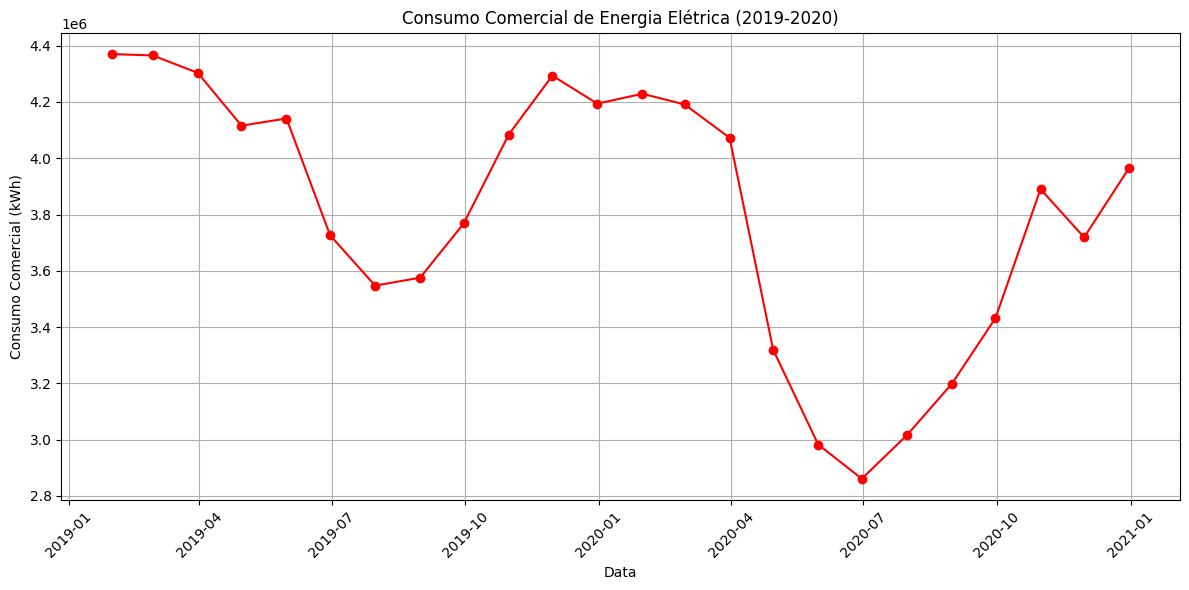

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Substitua o caminho do arquivo pelo caminho real do seu arquivo 'energia.csv'
file_path = '/content/energia.csv'

# Carregar os dados do arquivo CSV com o separador correto
df_energia = pd.read_csv(file_path, sep=';', parse_dates=['referencia'])

# Exibir as primeiras linhas e os nomes das colunas do DataFrame
print(df_energia.head())
print(df_energia.columns)

# Passo 1: Filtrar os dados entre 2019 e 2020
df_filtered = df_energia[(df_energia['referencia'] >= '2019-01-01') & (df_energia['referencia'] <= '2020-12-31')]

# Passo 2: Remover as linhas com valores nulos
df_filtered_no_na = df_filtered.dropna()

# Passo 3: Reamostrar o DataFrame para granularidade mensal, utilizando a média como métrica de agregação
df_resampled = df_filtered_no_na.resample('M', on='referencia').mean()

# Passo 4: Plotar o gráfico de linha para a série temporal de consumo comercial
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['comercial'], marker='o', linestyle='-', color='r')
plt.title('Consumo Comercial de Energia Elétrica (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Consumo Comercial (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

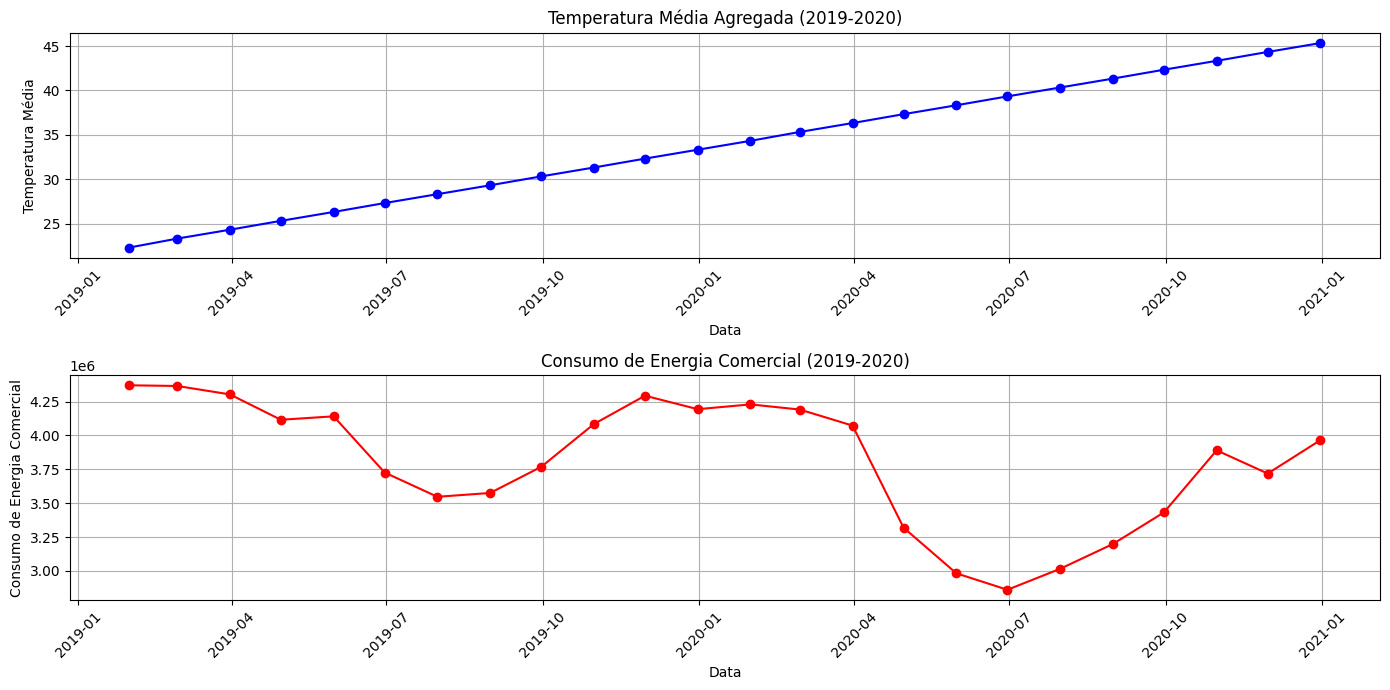

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do arquivo CSV
file_path = '/content/energia.csv'

# Carregar os dados usando o separador correto
df_energia = pd.read_csv(file_path, sep=';', parse_dates=['referencia'])

# Filtrar os dados entre 2019 e 2020
df_filtered = df_energia[(df_energia['referencia'] >= '2019-01-01') & (df_energia['referencia'] <= '2020-12-31')]

# Remover as linhas com valores nulos
df_filtered_no_na = df_filtered.dropna()

# Criar a coluna temp-media com a média das temperaturas
# Aqui, você deve garantir que a coluna temp-media exista. Vou usar o mesmo exemplo de dados.
df_temp = pd.read_csv(StringIO(data_temp), parse_dates=['referencia'])
df_temp_filtered = df_temp[(df_temp['referencia'] >= '2019-01-01') & (df_temp['referencia'] <= '2020-12-31')]
df_temp_filtered_no_na = df_temp_filtered.dropna()
df_temp_filtered_no_na['temp-media'] = df_temp_filtered_no_na[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)
df_temp_resampled = df_temp_filtered_no_na.resample('M', on='referencia').mean()

# Reamostrar o DataFrame de energia para granularidade mensal
df_energia_resampled = df_filtered_no_na.resample('M', on='referencia').mean()

# Mesclar os DataFrames de temperatura e consumo de energia comercial com base na coluna 'referencia'
df_merged = pd.merge(df_temp_resampled, df_energia_resampled[['comercial']], left_index=True, right_index=True)

# Plotar os gráficos
plt.figure(figsize=(14, 7))

# Gráfico de temperatura média
plt.subplot(2, 1, 1)
plt.plot(df_temp_resampled.index, df_temp_resampled['temp-media'], marker='o', linestyle='-', color='b')
plt.title('Temperatura Média Agregada (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Temperatura Média')
plt.grid(True)
plt.xticks(rotation=45)

# Gráfico de consumo de energia comercial
plt.subplot(2, 1, 2)
plt.plot(df_merged.index, df_merged['comercial'], marker='o', linestyle='-', color='r')
plt.title('Consumo de Energia Comercial (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Consumo de Energia Comercial')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



---